<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JoseRAdan/blob/main/Actividades/Actividad_Semanal_Visualizacion_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 6 - Actividad Visualizacion**
### **Ciencia y analítica de datos**
### **Profesor titular: Dra. Maria de la Paz Rico Fernandez**
### **Alumno: José Ramiro Adán Charles - A00174646**
### **Fecha: 1ro de Noviembre de 2022**


***NOTA: Las preguntas están respondidas a lo largo del notebook con comentarios en las celdas***

[**LINK TO COLAB NOTEBOOK**](https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JoseRAdan/blob/main/Actividades/Semana%206/Actividad_Semanal_Visualizacion_ver1.ipynb)

In [46]:
#Importar librerias necesarias de las funciones que se usaran en el notebook.
import pandas as pd
import numpy as np
import sklearn.preprocessing
import seaborn as sns

import matplotlib.pyplot as plt  
import os

import matplotlib as mpl
from sklearn.decomposition import PCA

# 1. Descarga los datos y carga el dataset en tu libreta. 

In [49]:
#Importamos los datos y revisamos el tamaño del dataframe resultante.
credit_card_client_df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-JoseRAdan/main/data_sources/default%20of%20credit%20card%20clients.csv')
df = credit_card_client_df.copy()

# 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna().

In [50]:
df.shape

(30000, 25)

In [51]:
#Mostramos el nombre de las columnas.
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
#Visualizamos las primeras 5 observaciones para tener una ideal del formato de los datos.
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [8]:
#Revisamos el tipo de dato de cada variable.
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [9]:
#Otro formato de entender la estructura del dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [10]:
#A partir de aqui revisaremos si hay datos faltante que habria que tratar de eliminar o llenar con algun valor representantivo como la media, mediana, moda.
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

In [11]:
#Vemos que isna() no es muy adecuado para detectar valores nulos pues el dataframe es muy grande, 
#por lo que usamos isnull().any() para ver que variable podria tener valores faltantes.
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [12]:
#Vemos que todas columnas tienen algun valor faltante, usare isnull().sum() para contabilizarlos.
df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [13]:
#El resultado muestra que la variable X16 tiene la mayor cantidad de valores faltantes.
#generemos un dataframe copia donde se eliminen los renglones que contengan al menos un dato faltante
#para determinar cuantas observaciones se eliminarian.
df_droppedna_rows = df.dropna(inplace = False)
df_droppedna_rows.shape

(29958, 25)

In [14]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [15]:
#Solo se eliminan 42 registros de 30,000, es decir, solo el 0.14% lo cual no debe ser representativo por lo que se procederá a trabajar con el nuevo dataframe de 19,958 observaciones.
#Validemos que no hay mas casos de observaciones con algun valor faltante.
df_droppedna_rows.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [16]:
#Renombremos las columnas para mas claridad en el dataframe
newColumnNames = ['ID','Total_Credito', 'Sexo', 'Estudios', 'Estado_Civil','Edad','PPSep2005','PPAgo2005','PPJul2005','PPJun2005','PPMay2005','PPAbr2005','TRSep2005', 'TRAgo2005','TRJul2005','TRJun2005','TRMay2005','TRAbr2005','TPPSep2005','TPPAgo2005','TPPJul2005','TPPJun2005','TPPMay2005','TPPAbr2005','Y']
df_droppedna_rows.columns = newColumnNames
df_droppedna_rows

,ID,Total_Credito,Sexo,Estudios,Estado_Civil,Edad,PPSep2005,PPAgo2005,PPJul2005,PPJun2005,...,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


# 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

In [17]:
#Calculemos la estadística descriptiva
df_droppedna_rows.describe()

,ID,Total_Credito,Sexo,Estudios,Estado_Civil,Edad,PPSep2005,PPAgo2005,PPJul2005,PPJun2005,...,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# 5. Realiza el conteo de las variables categóricas.

In [18]:
#Se observa que todas las variables tienen la misma cantidad de valores (29,958) lo que confirma no hay datos faltantes.
#Las variables categóricas, segun la descripcion de los datos son X2(Sexo), X3(Estudios), X4(Estado_Civil) y X6 a X11 (Historia de pagos pasados)

#Variables categoricas:
#De estas categóricas se detecta que 'Estudios' tiene valores no válidos (pues solo pueden ser 1, 2, 3 o 4) y se ve que presenta un valor mínimo de 0 y un máximo de 6.
#Así mismo 'Estado_Civil' tiene valores no válidos (pues solo pueden ser 1, 2 o 3) y se ve que presenta un valor mínimo de 0.
#'PPAbr2005 a PPSep2005' al parecer el valor esta restado por 1, pues va de -2 a 8 y en la descripcion de las variables se menciona que debe ir de -1 a 9.
#Igualmente la variable de salida Y es una variable binaria (Credito otorgado/No otorgado)

#Variables numéricas:
#Total_Credito, Edad, TRAbr2005 - TRSep2005 y TPPAbr2005 - TPPSep2005

#Escalamiento
#Otro punto a notar es que las escalas entre las distitintas variables es bastante dispar.

In [19]:
#Reemplazo de valores no válidos por válidos (el más frecuente)

#Encontremos la moda de la variable Estudios.
df_droppedna_rows.Estudios.mode()

0    2.0
dtype: float64

In [20]:
#Encontremos la moda de la variable Estado_Civil.
df_droppedna_rows.Estado_Civil.mode()

0    2.0
dtype: float64

In [21]:
#Para eliminar los valores no válidos (valores que no entra en ninguna categoría válida) vamos a reemplazarlos por las modas (valor mas frecuente) encontradas de cada uno.
df_droppedna_rows_cat_fixed = df_droppedna_rows.copy()
df_droppedna_rows_cat_fixed['Estudios'] = df_droppedna_rows_cat_fixed['Estudios'].replace(0, 2, inplace = False)
df_droppedna_rows_cat_fixed['Estudios'] = df_droppedna_rows_cat_fixed['Estudios'].replace(5, 2, inplace = False)
df_droppedna_rows_cat_fixed['Estudios'] = df_droppedna_rows_cat_fixed['Estudios'].replace(6, 2, inplace = False)

df_droppedna_rows_cat_fixed['Estado_Civil'] = df_droppedna_rows_cat_fixed['Estado_Civil'].replace(0, 2, inplace = False)


#Volvemos a describir el dataframe resultante.
df_droppedna_rows_cat_fixed.describe()

,ID,Total_Credito,Sexo,Estudios,Estado_Civil,Edad,PPSep2005,PPAgo2005,PPJul2005,PPJun2005,...,TRJun2005,TRMay2005,TRAbr2005,TPPSep2005,TPPAgo2005,TPPJul2005,TPPJun2005,TPPMay2005,TPPAbr2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.819180,1.555344,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.707461,0.518115,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [22]:
#Notamos que las variables categóricas ya muestran solo valores válidos.

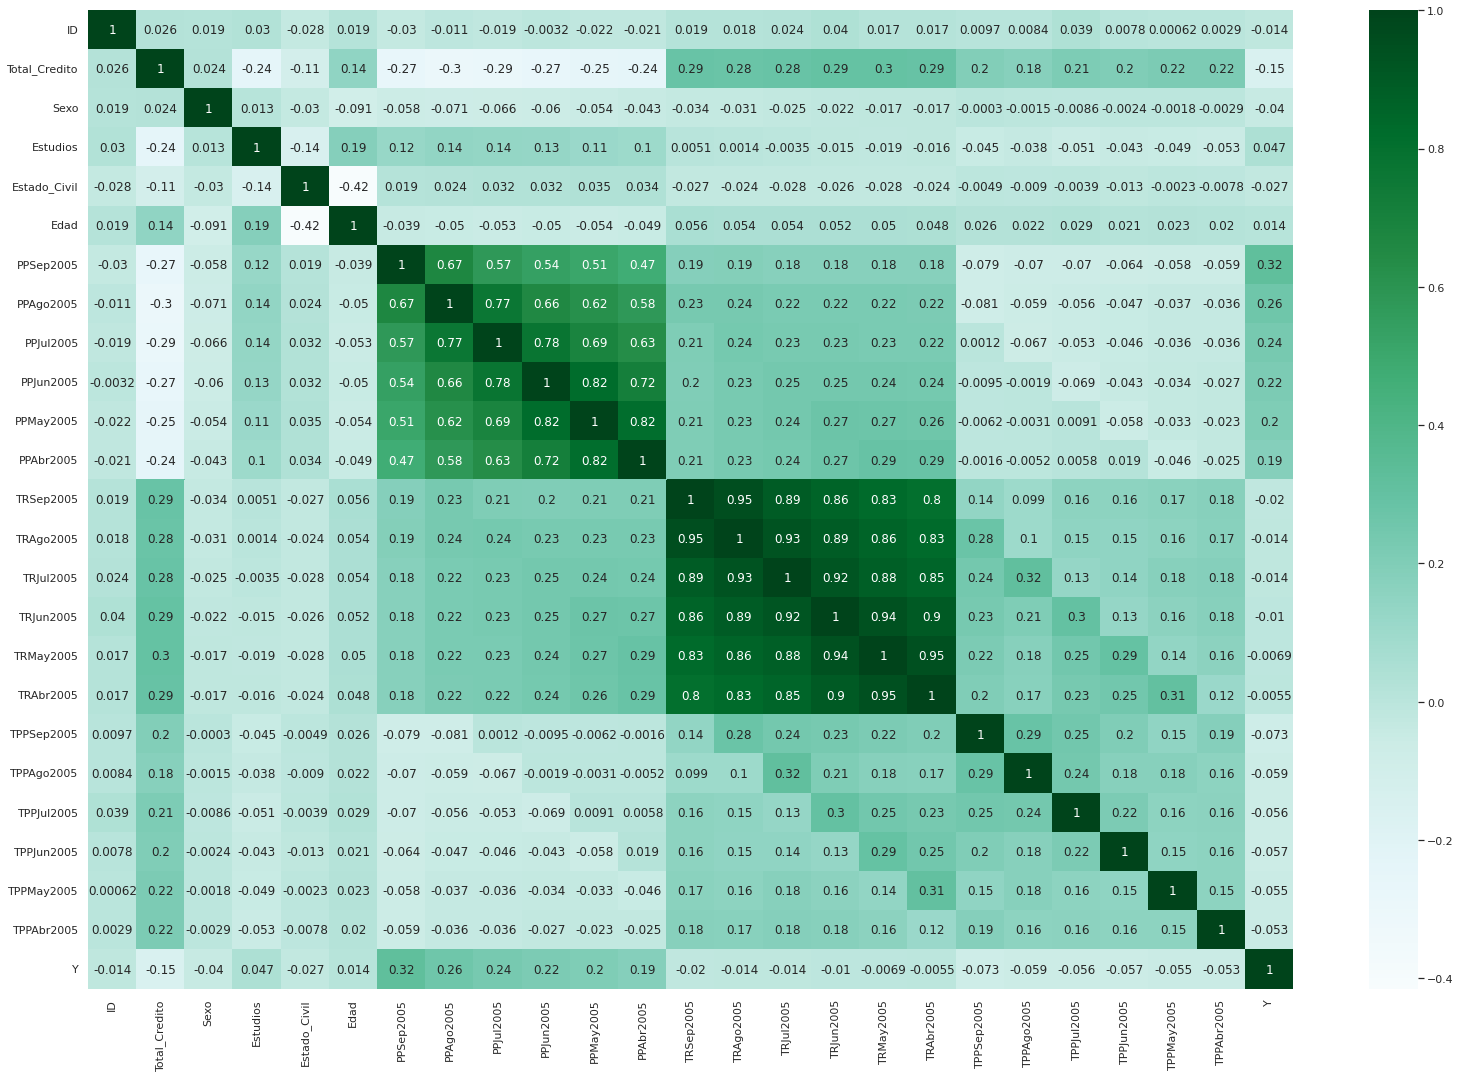

In [23]:
#Determinemos el nivel de correlacion entre la salida Y y las variables de entrada.
sns.set(rc={'figure.figsize':(27,18)})

#Mostremos la correlacion en un Heatmap
corr_matrix = df_droppedna_rows_cat_fixed.corr(method='pearson')
ax = sns.heatmap(corr_matrix, annot=True, cmap="BuGn")
plt.show()

In [24]:
#El Heatmap muestra de manera muy visual cuales variables están relacionadas con la variable de salida, no solo en colores sino mostrando el coeficiente de correlación.
#En base a dicha visualización, se determina que hay muchas variables no correlacionadas con la variable de salida, y las que si lo estan son: 
#Estudios, Edad, PPAbr2005 hasta PPSeo2005 (los 6 meses de historia de pagos pasados),#es decir, del total de variables, solo 8 tienen correlación con la variable de salida,
#y solamente la variable Edad es numérica.

#Limitemos el dataframe para que contenga solo las variables correlacionadas (mayores a 0.1 absoluto)
corrColumnNames = ['Total_Credito','Estudios','Edad','PPSep2005','PPAgo2005','PPJul2005','PPJun2005','PPMay2005','PPAbr2005','Y']
df_droppedna_rows_cat_fixed_corr = df_droppedna_rows_cat_fixed[corrColumnNames]
df_droppedna_rows_cat_fixed_corr

,Total_Credito,Estudios,Edad,PPSep2005,PPAgo2005,PPJul2005,PPJun2005,PPMay2005,PPAbr2005,Y
0,20000,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
1,120000,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
2,90000,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50000,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000,2.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
29995,220000,3.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,150000,3.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
29997,30000,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,1.0
29998,80000,3.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0


In [25]:
#Veamos la descripción de las variables nuevamente.
df_droppedna_rows_cat_fixed_corr.describe()

,Total_Credito,Estudios,Edad,PPSep2005,PPAgo2005,PPJul2005,PPJun2005,PPMay2005,PPAbr2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.819180,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575,0.221143
std,129737.299088,0.707461,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303,0.415023
min,10000.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,4.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


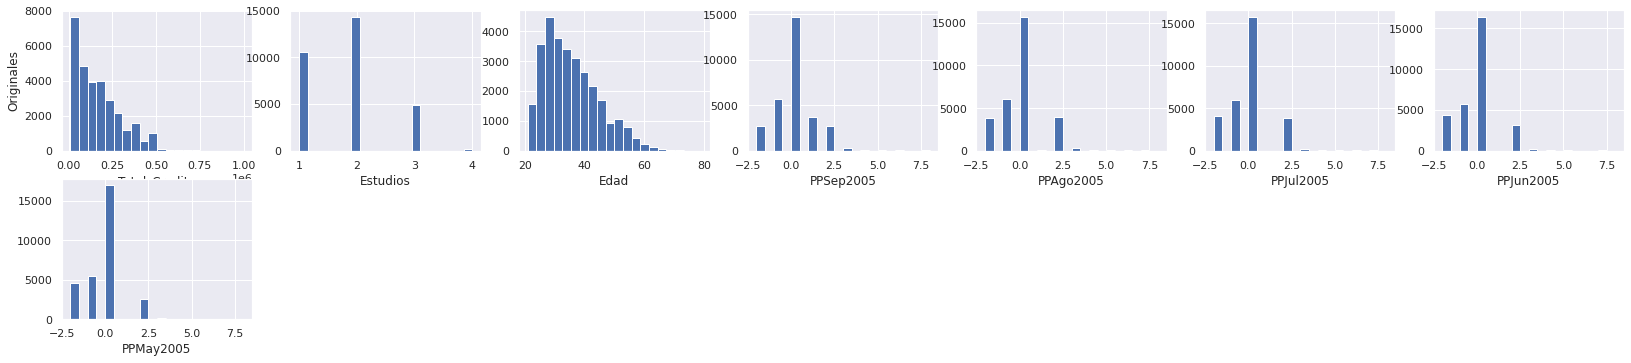

In [26]:
#Una forma clara de ver la distribución y las escalas de cada variable es graficando los histogramas de cada una.

sns.set(rc={'figure.figsize':(28,15)})
fig, axes = plt.subplots(1, 8)    
  
for k in range(0,8):       

    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1) 

    Transf0 = df_droppedna_rows_cat_fixed_corr[corrColumnNames[k]]
    plt.hist(Transf0, bins=20)


    plt.xlabel(corrColumnNames[k])
    if k==0:
      plt.ylabel('Originales')

# 6. Escala los datos, si consideras necesario

In [27]:
#En los histogramas se nota que todavia hay una importante diferencia de escalas, sobre todo la edad vs todas las demás.
#Definamos una la funcion de normalizacion para escalar las variables.

#Definimos la funcion para escalar los datos entre 0 y 1.
def NormalizeData(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [28]:
#Normalimzamos los valores a rangos entre 0 y 1.
df_droppedna_rows_cat_fixed_corr_norm = NormalizeData(df_droppedna_rows_cat_fixed_corr)
df_droppedna_rows_cat_fixed_corr_norm.describe()

,Total_Credito,Estudios,Edad,PPSep2005,PPAgo2005,PPJul2005,PPJun2005,PPMay2005,PPAbr2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,0.159147,0.273060,0.249715,0.198288,0.186598,0.183323,0.177889,0.173319,0.170843,0.221143
std,0.131048,0.235820,0.158868,0.112399,0.119717,0.119603,0.116842,0.113231,0.114930,0.415023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.000000,0.120690,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000
50%,0.131313,0.333333,0.224138,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000
75%,0.232323,0.333333,0.344828,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 7. Reduce las dimensiones con PCA, si consideras necesario.
Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

Indica la importancia de las variables en cada componente

In [29]:
#Ya normalizados los datos se puede aplicar el PCA, pues ya todos estan dentro de una misma escala.
#Además las variables categóricas estan representadas por numéros por lo que PCA puede calcularse.

pcs = PCA()
pcs.fit(df_droppedna_rows_cat_fixed_corr_norm.iloc[:, :-1].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,0.261688,0.224469,0.156098,0.114742,0.094962,0.073817,0.060287,0.051764,0.042382
Proportion of variance,0.382625,0.281525,0.136144,0.073561,0.050386,0.030445,0.020307,0.014971,0.010036
Cumulative proportion,0.382625,0.664150,0.800294,0.873855,0.924240,0.954686,0.974993,0.989964,1.000000


In [30]:
#En este caso vemos que de las 9 dimensiones, se puede considerar que con 3 ya se pasa de la varianza del 70%.

In [42]:
#
pcsSummary_df.iloc[2,2]

0.8002938341835454

# 8. Elabora los histogramas de los atributos para visualizar su distribución.

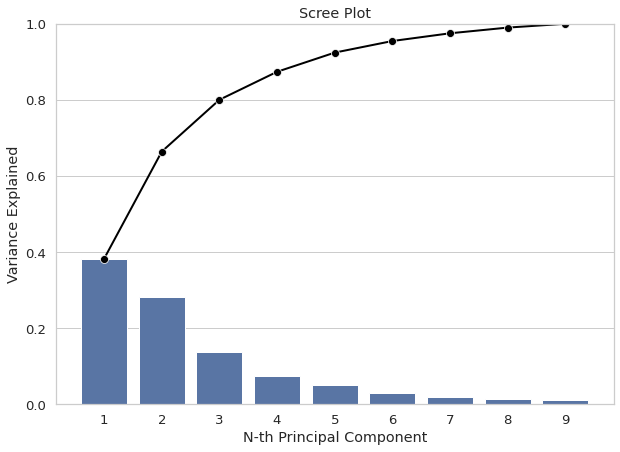

In [32]:
#Mostremos la Scree Plot para visualizar como de manera más gráfica la proporción de variaza aportada por cada componenta principal.

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [33]:
#Visualizamos en la gráfica la aportación a la varianza total de cada componente, y como efectivamente 2 ya suman mas del 70%.

In [43]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df_droppedna_rows_cat_fixed_corr_norm.iloc[:, :-1].columns
                                )
pcsComponents_df.iloc[:,:3]

,PC1,PC2,PC3
Total_Credito,-0.233267,-0.049970,0.305280
Estudios,0.637797,-0.725146,-0.182446
Edad,0.049080,-0.264254,0.913473
PPSep2005,0.254544,0.206595,0.050732
PPAgo2005,0.315986,0.259483,0.067875
PPJul2005,0.323102,0.275266,0.080287
PPJun2005,0.315892,0.276795,0.093186
PPMay2005,0.296548,0.268447,0.091703
PPAbr2005,0.282186,0.259561,0.091459


In [35]:
pcsComponents_df.PC1.idxmax()

'Estudios'

In [36]:
pcsComponents_df.PC1.nlargest(2)

Estudios     0.637797
PPJul2005    0.323102
Name: PC1, dtype: float64

In [37]:
pcsComponents_df.PC2.idxmax()

'PPJun2005'

In [38]:
pcsComponents_df.PC2.nlargest(2)

PPJun2005    0.276795
PPJul2005    0.275266
Name: PC2, dtype: float64

In [44]:
pcsComponents_df.PC3.idxmax()

'Edad'

In [45]:
pcsComponents_df.PC3.nlargest(2)

Edad             0.913473
Total_Credito    0.305280
Name: PC3, dtype: float64

In [39]:
#Para PC1 las variables mas importantes son Estudios y PPJul2005, siendo Estudios la que más varianza aporta.
#Para PC2 las variables mas importantes son PPJun2005 y PPJul2005, siendo PPJun2005 la que más varianza aporta.
#Para PC3 las variables mas importantes son Edad y Total_Credito, siendo Edad la que más varianza aporta.

# 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

In [40]:
#A lo largo del notebook se usaron 3 tipos de gráficos:
#Heatmap, Histograma y Scree Plot

# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [41]:
#Heatmap - ayudó a decidir cuales variable de entrada dejar para el análisis.
#Histograma - permitió visualizar rápidamente las escalas y la distribucion de las variables elegidas.
#Scree Plot - Muestra de una manera muy clara la contribución de los componentes principales PCA, donde claramente con los dos primeros se supera el 70% indicado en la tarea.